In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import splat
import astropy.units as u
import popsims
splat.initializeStandards(all=True)
from scipy import interpolate
from tqdm import tqdm
from astropy.table import Table

%matplotlib inline

/users/caganze/research/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#read in aurora files
#import kastredux
FUNITS=u.erg/u.micron/u.s/(u.cm**2)
WUNITS=u.micron
files=glob.glob('/volumes/LaCie/AuroraTemplates/*.fits')

In [3]:
def get_spectrum(f):
        spec_data=Table(fits.open(f)[1].data).to_pandas()
        phot_data=(Table(fits.open(f)[-1].data).to_pandas()).to_dict()
        spec_type=f.split('/')[-1].split('.fits')[0]
        wave=(10**spec_data.LogLam.values)*WUNITS/10000
        flux=spec_data.Flux.values*FUNITS
        noise=spec_data.PropErr.values*FUNITS
        s=splat.Spectrum(wave=wave, flux=flux, noise=noise, name=f)
        
        return {'spectrum': s,
                'spectype': spec_type,
                'phot': phot_data}

In [4]:
spectra=pd.DataFrame([ get_spectrum(f) for f in tqdm(files)])

100%|███████████████████████████████████████████| 37/37 [00:05<00:00,  7.05it/s]


In [5]:
 def is_dwarf_aurora(x):
    sx= x.split('_')
    if len(sx)==1:
        return True
    else:
        return sx[1].startswith('+')
    
def proper_spectral_type(x):
    sx= x.split('_')
    return sx[0]

In [6]:
spectra['is_dwarf']=spectra.spectype.apply(is_dwarf_aurora)
spectra['proper_type']=spectra.spectype.apply(proper_spectral_type)

In [19]:
spectra

,spectrum,spectype,phot,is_dwarf,proper_type
0,spectrum of /volumes/LaCie/AuroraTemplates/L0...,L0,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L0
1,spectrum of /volumes/LaCie/AuroraTemplates/L1...,L1,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L1
2,spectrum of /volumes/LaCie/AuroraTemplates/L6...,L6,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L6
3,spectrum of /volumes/LaCie/AuroraTemplates/L2...,L2,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L2
4,spectrum of /volumes/LaCie/AuroraTemplates/L3...,L3,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",True,L3
5,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_+0.0_Dwarf,"{'u-g': {0: 2.4598464965820312, 1: 0.012154936...",True,M0
6,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_+0.5_Dwarf,"{'u-g': {0: 2.5878138542175293, 1: 0.011759408...",True,M0
7,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_+1.0_Dwarf,"{'u-g': {0: 2.844008684158325, 1: 0.0408333800...",True,M0
8,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_Giant,"{'u-g': {0: 2.9665489196777344, 1: 0.096475265...",False,M0
9,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_-0.5_Dwarf,"{'u-g': {0: 2.385930061340332, 1: 0.0714462026...",False,M0


[(-1.0, 5.0)]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


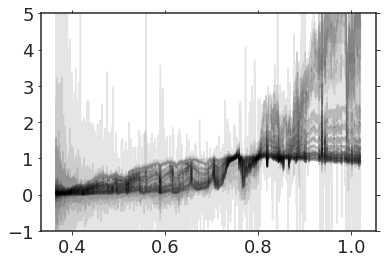

In [9]:
fig, ax=plt.subplots()
for a in spectra.spectrum.values:
    ax.plot(a.wave, a.flux, alpha=0.1, c='k')
ax.set(ylim=[-1, 5])

In [12]:
pd.DataFrame.from_records(spectra.phot.values)

,u-g,g-r,r-i,i-z
0,"{0: nan, 1: -999.0, 2: -999.0}","{0: nan, 1: -999.0, 2: -999.0}","{0: 2.5144293308258057, 1: 0.02486532367765903...","{0: 1.814530372619629, 1: 0.006238436792045832..."
1,"{0: nan, 1: -999.0, 2: -999.0}","{0: nan, 1: -999.0, 2: -999.0}","{0: 2.440281629562378, 1: 0.042884886264801025...","{0: 1.8603227138519287, 1: 0.00966475345194339..."
2,"{0: nan, 1: -999.0, 2: -999.0}","{0: nan, 1: -999.0, 2: -999.0}","{0: nan, 1: -999.0, 2: -999.0}","{0: 2.2454347610473633, 1: 0.03490876033902168..."
3,"{0: nan, 1: -999.0, 2: -999.0}","{0: nan, 1: -999.0, 2: -999.0}","{0: nan, 1: -999.0, 2: -999.0}","{0: 1.82481050491333, 1: 0.0293529462069273, 2..."
4,"{0: nan, 1: -999.0, 2: -999.0}","{0: nan, 1: -999.0, 2: -999.0}","{0: 2.49398136138916, 1: 0.06386108696460724, ...","{0: 1.84384024143219, 1: 0.0162563007324934, 2..."
5,"{0: 2.4598464965820312, 1: 0.01215493679046630...","{0: 1.2569621801376343, 1: 0.00450700474902987...","{0: 0.5632107257843018, 1: 0.00408593658357858...","{0: 0.33499640226364136, 1: 0.0049024885520339..."
6,"{0: 2.5878138542175293, 1: 0.01175940874963998...","{0: 1.2750391960144043, 1: 0.00446052150800824...","{0: 0.578353762626648, 1: 0.004189120605587959...","{0: 0.351327508687973, 1: 0.004324717447161674..."
7,"{0: 2.844008684158325, 1: 0.040833380073308945...","{0: 1.2855377197265625, 1: 0.01308687403798103...","{0: 0.5738566517829895, 1: 0.0118022495880723,...","{0: 0.30077171325683594, 1: 0.0134698199108242..."
8,"{0: 2.9665489196777344, 1: 0.0964752659201622,...","{0: 1.3026657104492188, 1: 0.01875190995633602...","{0: 0.5324268341064453, 1: 0.02000988088548183...","{0: 0.3406944274902344, 1: 0.02244183048605919..."
9,"{0: 2.385930061340332, 1: 0.07144620269536972,...","{0: 1.2944024801254272, 1: 0.01026385091245174...","{0: 0.6028655171394348, 1: 0.00920254644006490...","{0: 0.36016687750816345, 1: 0.0112351439893245..."


In [18]:
spectra[~spectra.is_dwarf]

,spectrum,spectype,phot,is_dwarf,proper_type
8,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_Giant,"{'u-g': {0: 2.9665489196777344, 1: 0.096475265...",False,M0
9,spectrum of /volumes/LaCie/AuroraTemplates/M0...,M0_-0.5_Dwarf,"{'u-g': {0: 2.385930061340332, 1: 0.0714462026...",False,M0
11,spectrum of /volumes/LaCie/AuroraTemplates/M1...,M1_-0.5_Dwarf,"{'u-g': {0: 2.1231536865234375, 1: 0.107061907...",False,M1
12,spectrum of /volumes/LaCie/AuroraTemplates/M1...,M1_-1.0_Dwarf,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",False,M1
15,spectrum of /volumes/LaCie/AuroraTemplates/M2...,M2_-0.5_Dwarf,"{'u-g': {0: 2.4067764282226562, 1: 0.066522426...",False,M2
17,spectrum of /volumes/LaCie/AuroraTemplates/M2...,M2_-1.0_Dwarf,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",False,M2
20,spectrum of /volumes/LaCie/AuroraTemplates/M3...,M3_-0.5_Dwarf,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",False,M3
21,spectrum of /volumes/LaCie/AuroraTemplates/M3...,M3_-1.0_Dwarf,"{'u-g': {0: nan, 1: -999.0, 2: -999.0}, 'g-r':...",False,M3
26,spectrum of /volumes/LaCie/AuroraTemplates/M5...,M5_-0.5_Dwarf,"{'u-g': {0: 2.166687488555908, 1: 0.0113558666...",False,M5
29,spectrum of /volumes/LaCie/AuroraTemplates/M6...,M6_-0.5_Dwarf,"{'u-g': {0: 2.3002266883850098, 1: 0.021056015...",False,M6


In [20]:
np.save('/Volumes/LaCie/popsimsdata/aurora_templates.npy', [spectra], allow_pickle=True)